#### Import Required Libraries

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Reset & Connect to the SQLite database

In [5]:
db_path = "sales_data.db"
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

#### Create a New Sales Table

In [3]:
cursor.execute("DROP TABLE IF EXISTS sales")
cursor.execute("""
CREATE TABLE sales (
   id INTEGER PRIMARY KEY AUTOINCREMENT,
   customer_name TEXT,
   product TEXT,
   category TEXT,
   quantity INTEGER,
   price REAL,
   total_sales REAL,
   country TEXT,
   purchase_date TEXT
)
""")
conn.commit()

#### Insert Sample Data

In [4]:
sales_data = [
    ("Rina Hartono", "Chicken - Bones", "Meat", 15, 2.5, 37.5, "Indonesia", "2025-06-10"),
    ("Luis Figueira", "Puff Pastry - Slab", "Bakery", 10, 3.2, 32.0, "Portugal", "2025-06-09"),
    ("Eva Janssen", "Lamb - Loin Chops", "Meat", 8, 12.0, 96.0, "Netherlands", "2025-06-08"),
    ("Tiana Rakoto", "Dried Figs", "Fruits & Nuts", 5, 4.5, 22.5, "Madagascar", "2025-06-07"),
    ("Ivan Petrov", "Cheese Cloth No 60", "Kitchen Supplies", 20, 1.0, 20.0, "Russia", "2025-06-06"),
    ("Carlos Quispe", "Flour - Fast / Rapid", "Baking Ingredients", 25, 1.2, 30.0, "Peru", "2025-06-05"),
    ("Ana Duarte", "Cinnamon Buns Sticky", "Bakery", 12, 2.8, 33.6, "Portugal", "2025-06-04"),
    ("Nadia Saleh", "Brandy Apricot", "Beverages / Preserves", 6, 5.5, 33.0, "Yemen", "2025-06-03"),
    ("John Carter", "Water - Green Tea Refresher", "Beverages", 30, 1.5, 45.0, "United States", "2025-06-02")
]
cursor.executemany("INSERT INTO sales (customer_name, product, category, quantity, price,total_sales, country, purchase_date) VALUES (?, ?, ?, ?, ?, ?, ?, ?)", sales_data)
conn.commit()

#### Query the New Table and Verify Data

In [6]:
import pandas as pd

# Fetch all data from new table
query = "SELECT * FROM sales"
df = pd.read_sql(query,conn)

# Display the first few rows of the dataset
print(df.head())

   id  customer_name             product          category  quantity  price  \
0   1   Rina Hartono     Chicken - Bones              Meat        15    2.5   
1   2  Luis Figueira  Puff Pastry - Slab            Bakery        10    3.2   
2   3    Eva Janssen   Lamb - Loin Chops              Meat         8   12.0   
3   4   Tiana Rakoto          Dried Figs     Fruits & Nuts         5    4.5   
4   5    Ivan Petrov  Cheese Cloth No 60  Kitchen Supplies        20    1.0   

   total_sales      country purchase_date  
0         37.5    Indonesia    2025-06-10  
1         32.0     Portugal    2025-06-09  
2         96.0  Netherlands    2025-06-08  
3         22.5   Madagascar    2025-06-07  
4         20.0       Russia    2025-06-06  


#### Perform Basis Analysis(Filter high_value sales)

In [8]:
query = "SELECT * FROM sales WHERE total_sales > 30"
df_filtered = pd.read_sql(query,conn)

print(df_filtered)

   id  customer_name                      product               category  \
0   1   Rina Hartono              Chicken - Bones                   Meat   
1   2  Luis Figueira           Puff Pastry - Slab                 Bakery   
2   3    Eva Janssen            Lamb - Loin Chops                   Meat   
3   7     Ana Duarte         Cinnamon Buns Sticky                 Bakery   
4   8    Nadia Saleh               Brandy Apricot  Beverages / Preserves   
5   9    John Carter  Water - Green Tea Refresher              Beverages   

   quantity  price  total_sales        country purchase_date  
0        15    2.5         37.5      Indonesia    2025-06-10  
1        10    3.2         32.0       Portugal    2025-06-09  
2         8   12.0         96.0    Netherlands    2025-06-08  
3        12    2.8         33.6       Portugal    2025-06-04  
4         6    5.5         33.0          Yemen    2025-06-03  
5        30    1.5         45.0  United States    2025-06-02  


#### Run SQL query to get total quantity and revenue per product

In [9]:
query = """
SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

#### Display the results using print

In [10]:
print(df)

                       product  total_qty  revenue
0               Brandy Apricot          6     33.0
1           Cheese Cloth No 60         20     20.0
2              Chicken - Bones         15     37.5
3         Cinnamon Buns Sticky         12     33.6
4                   Dried Figs          5     22.5
5         Flour - Fast / Rapid         25     30.0
6            Lamb - Loin Chops          8     96.0
7           Puff Pastry - Slab         10     32.0
8  Water - Green Tea Refresher         30     45.0


#### Plot bar chart

<Figure size 800x500 with 0 Axes>

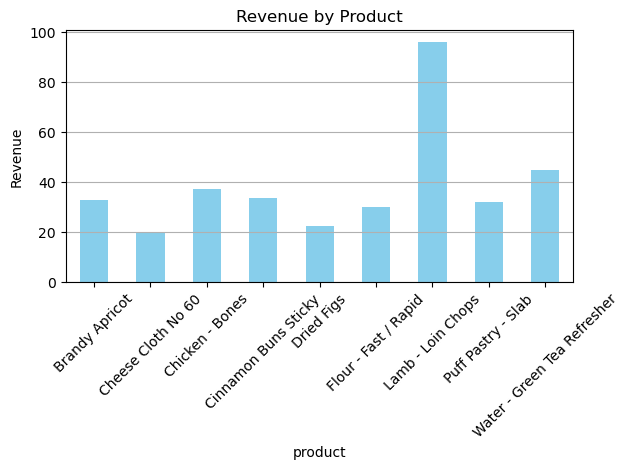

In [13]:
plt.figure(figsize=(8,5))
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.savefig("sales_summary_chart.png")
plt.show()

#### Save the Chart

In [32]:
plt.savefig("sales_bar_chart.png")

<Figure size 640x480 with 0 Axes>

In [ ]:
#### Show c

#### Close the connection

In [15]:
conn.close()

#### Save the chart

In [27]:
plt.savefig("sales_bar_chart.png")

<Figure size 640x480 with 0 Axes>

In [23]:
plt.show()

#### Load Data from SQLite into Pandas Dataframe

In [29]:
import pandas as pd
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect("sales_data.db")

# Read all data from the sales table into a pandas Dataframe
query =  "SELECT * FROM sales"
df = pd.read_sql_query(query, conn)

# Display the first few rows
print(df.head())

#close the connection
conn.close()


   id  customer_name             product          category  quantity  price  \
0   1   Rina Hartono     Chicken - Bones              Meat        15    2.5   
1   2  Luis Figueira  Puff Pastry - Slab            Bakery        10    3.2   
2   3    Eva Janssen   Lamb - Loin Chops              Meat         8   12.0   
3   4   Tiana Rakoto          Dried Figs     Fruits & Nuts         5    4.5   
4   5    Ivan Petrov  Cheese Cloth No 60  Kitchen Supplies        20    1.0   

   total_sales      country purchase_date  
0         37.5    Indonesia    2025-06-10  
1         32.0     Portugal    2025-06-09  
2         96.0  Netherlands    2025-06-08  
3         22.5   Madagascar    2025-06-07  
4         20.0       Russia    2025-06-06  
